https://adventofcode.com/2018/day/6

Objective: given a list of coordinates in 2D space, find the coordinate that gives the largest distance from the other points.

"Using only the Manhattan distance, determine the area around each coordinate by counting the number of integer X,Y locations that are closest to that coordinate (and aren't tied in distance to any other coordinate).

Your goal is to find the size of the largest area that isn't infinite."

---

Key issue is: How to go from calculating the the manhattan distance to determining how many other locations are closest? 

The end answer is area, so should I somehow make a 2D representation of the coordinates, like in the example?

How can I identify and therefore discard the coordinates that are on the edges of our 2D space (and therefore infinite)?

manhattan or taxicab distance is "a form of geometry in which the usual distance function or metric of Euclidean geometry is replaced by a new metric in which the distance between two points is the sum of the absolute differences of their Cartesian coordinates"

Be mindful of off by one errors depending on how the coordinates are defined


In plain english:
populate the grid, looping through manhattan distance fore ach of the points. 
which point does that coordinate on hte grid "belong" to?
careful that things are tied belong to no point
then, sum up each point's number of coordinates that "Belong" to them
which point has the most, that ISNT on the border or in infinite space?

Baby step tasks:

- determine size of grid
- convert our text file to coordinate format ()
- write function to calculate manhattan distances 
- use that function to loop: for a specific coordinate to all points in our list, and take min
- make tied distances null
- tally up # of coordinates that belong to each point
- exclude the points that are on the border and have infinite space
- take point that has the max # of coordinates that belong to it

In [1]:
from scipy.spatial import distance
import itertools
from tqdm import tqdm
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#determine size of the grid, and convert text file to coordinate format
xs = []
ys = []
destination_coordinates = []

with open('input_D6.txt') as file:
    for line in file:
        line = line.strip()
        x, y = [int(line) for line in line.split(',')]
        xs.append(x)
        ys.append(y)
        destination_coordinates.append((x, y))
        

print('{0} is the max x-coordinate, {1} is the min x-coordinate'.format(max(xs), min(xs)))
print('{0} is the max y-coordinate, {1} is the min y-coordinate'.format(max(ys), min(ys)))

print('The working grid is {} x {}.'.format((max(xs) - min(xs)), (max(ys) - min(ys))))
print('The total number of coordinates to query is {}.'.format((max(xs) - min(xs))*(max(ys) - min(ys))))

358 is the max x-coordinate, 70 is the min x-coordinate
355 is the max y-coordinate, 43 is the min y-coordinate
The working grid is 288 x 312.
The total number of coordinates to query is 89856.


In [3]:
#how do we check for off by one errors here?
#this makes a list of all the coordinates in our grid

x_points = list(range(min(xs), max(xs)))
y_points = list(range(min(ys), max(ys)))

all_coordinates = (list(itertools.product(x_points, y_points)))
print(len(all_coordinates))

89856


In [4]:
def calculate_manhattan_distance(coordinate1, coordinate2):
    return distance.cityblock(coordinate1, coordinate2)

In [5]:
#work with the index of the destination_coordinates as identifiers

def closest_destination(coordinate):
    distances = [calculate_manhattan_distance(coordinate, destination) for destination in destination_coordinates]
    min_distance = min(distances)

    closest_destinations = [index for index, distance in enumerate(distances) if distance == min_distance]
    if len(closest_destinations) > 1:
        closest_destination = -1 #sentinel value
    else:
        closest_destination = closest_destinations[0]
    
    return closest_destination

In [6]:
closest_distances_grid = np.full((max(xs) + 1, max(ys) + 1), -1)

for row in tqdm(range(max(xs) + 1)):
    for col in range(max(ys) + 1):
        closest_distances_grid[row, col] = closest_destination((row, col))

100%|██████████| 359/359 [01:18<00:00,  4.82it/s]


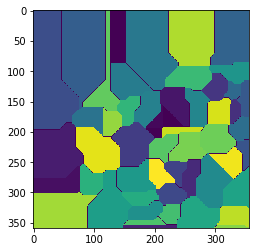

In [7]:
plt.imshow(closest_distances_grid)

Count which one has smallest number, make sure to discard -1 values or any value on the edge of the grid.

Figure out which values are on the edge (in a numpyarray).

Go back to where you define xs and ys and make sure you're not off by 1 in accordance with directions.

In [8]:
#size of the grid
print((max(xs) + 1, max(ys) + 1))

(359, 356)


To remove edges, collect the numbers seen in the first row, the last row, the first column, and the last column. Then exclude these numbers from our counter below.

In [9]:
data = np.array([[11, 22, 33],
[44, 55, 66],
[77, 88, 99]])

In [10]:
edges_of_grid = []
#first column slicing
edges_of_grid.append((closest_distances_grid[:, 0]).tolist())

#first row slicing
edges_of_grid.append((closest_distances_grid[0, :]).tolist())

#last column slicing
edges_of_grid.append((closest_distances_grid[:, -1]).tolist())

#last row slicing
edges_of_grid.append((closest_distances_grid[-1, :]).tolist())

In [12]:
s = {}

In [13]:
to_discard = {-1}
to_discard.update(closest_distances_grid[:, 0])
to_discard.update(closest_distances_grid[0, :])
to_discard.update(closest_distances_grid[:, -1])
to_discard.update(closest_distances_grid[-1, :])

In [14]:
to_discard

{-1, 1, 3, 4, 11, 12, 13, 14, 15, 17, 19, 25, 27, 28, 29, 37, 40, 42, 43, 44}

In [15]:
destinations_to_discard = set()
for item in edges_of_grid:
    for number in item:
        destinations_to_discard.add(number)

In [16]:
destinations_to_discard

{-1, 1, 3, 4, 11, 12, 13, 14, 15, 17, 19, 25, 27, 28, 29, 37, 40, 42, 43, 44}

In [17]:
closest_distances_grid

array([[11, 11, 11, ..., 15, 15, 15],
       [11, 11, 11, ..., 15, 15, 15],
       [11, 11, 11, ..., 15, 15, 15],
       ...,
       [42, 42, 42, ..., 44, 44, 44],
       [42, 42, 42, ..., 40, 40, 40],
       [42, 42, 42, ..., 40, 40, 40]])

In [18]:
#before running this I need to remove edges
areas = Counter(closest_distances_grid.flatten()).most_common()

In [19]:
#before running this I need to remove edges
areas = Counter(v for v in closest_distances_grid.flatten() if v not in destinations_to_discard).most_common()

In [20]:
relevant_areas = [(index, area) for (index, area) in areas if index not in destinations_to_discard]

In [21]:
relevant_areas

[(47, 4016),
 (23, 3414),
 (8, 3373),
 (20, 2702),
 (26, 2470),
 (33, 2400),
 (38, 2365),
 (2, 2086),
 (39, 2076),
 (22, 1868),
 (21, 1807),
 (18, 1665),
 (48, 1501),
 (36, 1484),
 (46, 1451),
 (31, 1446),
 (5, 1361),
 (24, 1361),
 (7, 1358),
 (10, 1338),
 (49, 1298),
 (32, 1251),
 (30, 1115),
 (41, 1111),
 (9, 958),
 (34, 913),
 (45, 656),
 (16, 577),
 (6, 576),
 (35, 552),
 (0, 465)]

Part two objective: determine the number of coordinates that have a collective manhattan distance to the destinations less than 10000.

I'm assuming its ok that our grid is bigger than the area of interest since the further away we get, the less likely that coordinate will have a collective manhattan distance less than 10,000?

In [22]:
#work with the index of the destination_coordinates as identifiers

def total_manhattan_less_than_value(coordinate):
    value = 10000
    distances = [calculate_manhattan_distance(coordinate, destination) for destination in destination_coordinates]

    if sum(distances) > value:
        qualified_coordinate = -1 #sentinel value
    else:
        qualified_coordinate = 1
    
    return qualified_coordinate

In [23]:
total_distances_grid = np.full((max(xs) + 1, max(ys) + 1), -1)

for row in tqdm(range(max(xs) + 1)):
    for col in range(max(ys) + 1):
        total_distances_grid[row, col] = total_manhattan_less_than_value((row, col))

100%|██████████| 359/359 [01:15<00:00,  4.71it/s]


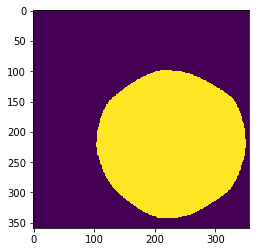

In [24]:
plt.imshow(total_distances_grid)

In [25]:
area_totals = Counter(total_distances_grid.flatten()).most_common()

In [26]:
area_totals

[(-1, 81498), (1, 46306)]

In [27]:
safe_area = [area for (index, area) in area_totals if index != -1]

In [28]:
safe_area

[46306]